In [33]:
from sklearn.datasets import make_blobs # Crear dataset de datos
import pandas as pd # Manipular datos
import matplotlib.pyplot as plt # Graficar
import seaborn as sns # Graficar

In [55]:
# 100 datapoints, número de ejemplos
# 4 centros o 4 clústers
# 2 features
# clusters_std qué tan cerca están los datos de si mismos o de su centro
# random_state replicación de resultados
# Todo se guarda en x y y
x, y = make_blobs(n_samples=100, centers=4, n_features=2, cluster_std=[1,1.5,2,2], random_state=7)
df_blobs = pd.DataFrame({
    'x1': x[:,0],
    'x2': x[:,1],
    'y': y # Indicará el cluster
})
df_blobs

# cluster no se va a utilizar para clasificar los datos si no para comprobar el clústering

,x1,x2,y
0,-3.384261,5.221740,1
1,-1.836238,-7.735384,3
2,-7.456176,6.198874,0
3,-1.785043,1.609749,1
4,-10.124910,6.133805,0
...,...,...,...
95,7.072755,-0.259937,2
96,-2.626873,-7.228570,3
97,-1.521099,1.802284,1
98,-9.216388,6.670846,0


In [62]:
# Función para diagramar los datos
def plot_2d_clusters(x,y,ax): # Creación de gráfica de dos dimensiones
  y_uniques = pd.Series(y).unique() # Unique para que nos muestre sólo los valores únicos [0,1,2,3]
# Se hace una iteración
  for _ in y_uniques:
    x[y ==_].plot(  # de x sólo necesito cuando y == al valor que se stá iterando
        title=f'{len(y_uniques)} Clusters', # Cuántos valores únicos tiene
        kind='scatter',
        x='x1',
        y='x2', # Se está trabajando con dos dimensiones
        marker = f'${_}$', # En este caso se está enviando por parámetro
        ax = ax
                            )


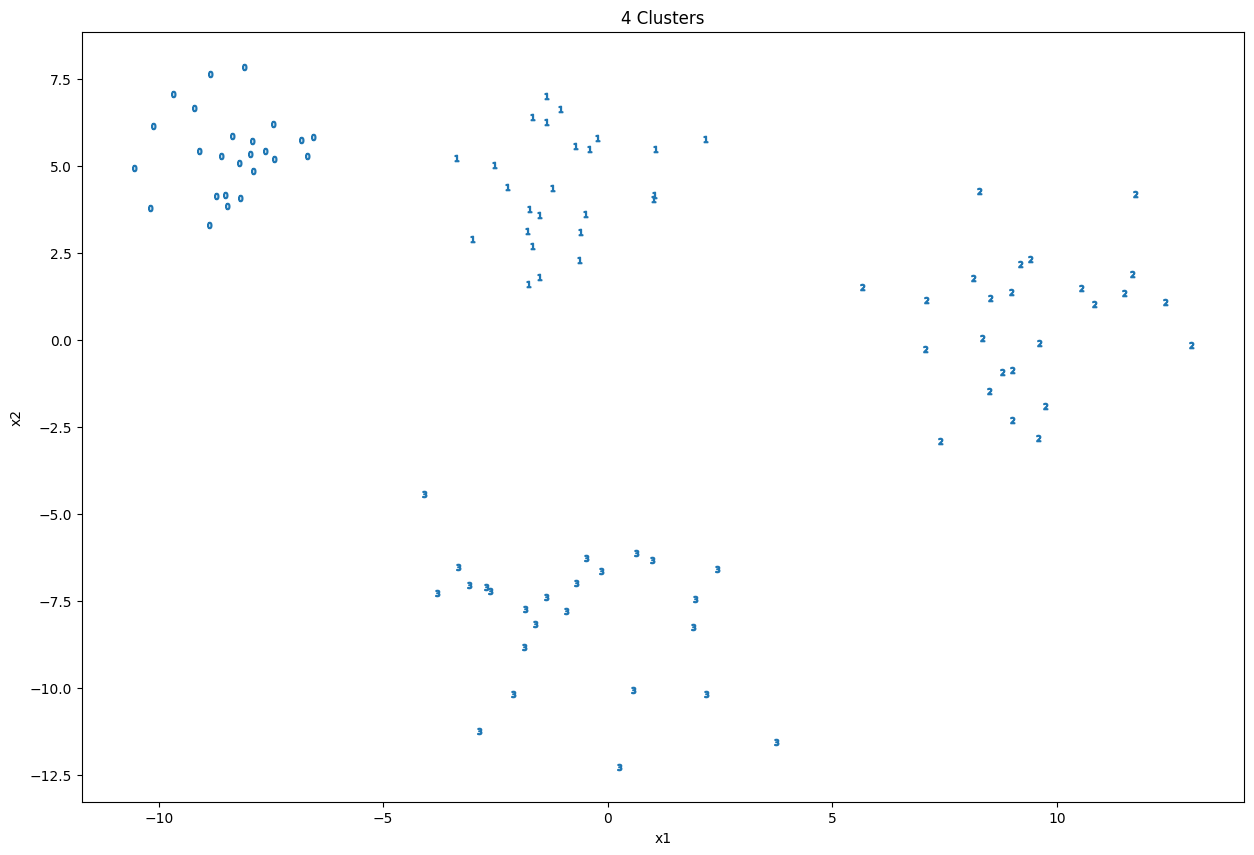

In [63]:
# Testeo de la función
fig, ax = plt.subplots(1,1, figsize=(15,10))
x, y = df_blobs[['x1','x2']], df_blobs['y']
plot_2d_clusters(x,y,ax)
#

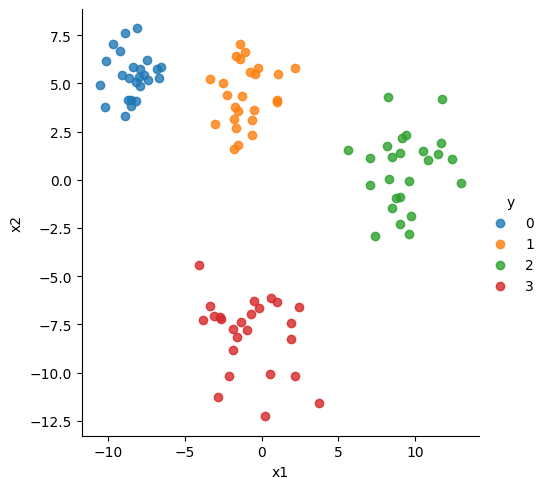

In [72]:
# Testeo de la función
sns.lmplot(data=df_blobs, x='x1', y='x2', hue='y', fit_reg=False);
#

# Aplicando clustering

In [66]:
from sklearn.cluster import KMeans # Clustering

In [69]:
# K = número de clústers que va a ejecutar
# means = cómo funciona ese algoritmo por debajo

kmeans = KMeans(n_clusters=4, random_state=7)

In [70]:
# Entrenamiento del modelo
y_pred = kmeans.fit_predict(x) # Hasta aquí no ha visto la respuesta de a qué clúster pertenece.
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 3, 1, 2, 1, 2, 3, 0, 1, 3, 3, 0, 3, 1, 2, 3, 3, 0, 3, 1, 2, 1,
       1, 3, 0, 1, 0, 0, 3, 2, 3, 3, 2, 3, 3, 1, 0, 1, 2, 1, 3, 2, 2, 0,
       2, 0, 1, 1, 0, 1, 0, 3, 0, 3, 2, 1, 2, 3, 2, 2, 2, 3, 2, 0, 1, 0,
       1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 3, 2, 2, 2, 1, 3, 0, 3, 0, 1,
       1, 2, 3, 2, 1, 3, 0, 0, 3, 2, 1, 2], dtype=int32)

Text(0.5, 1.0, 'Kmeans 4 Clusters')

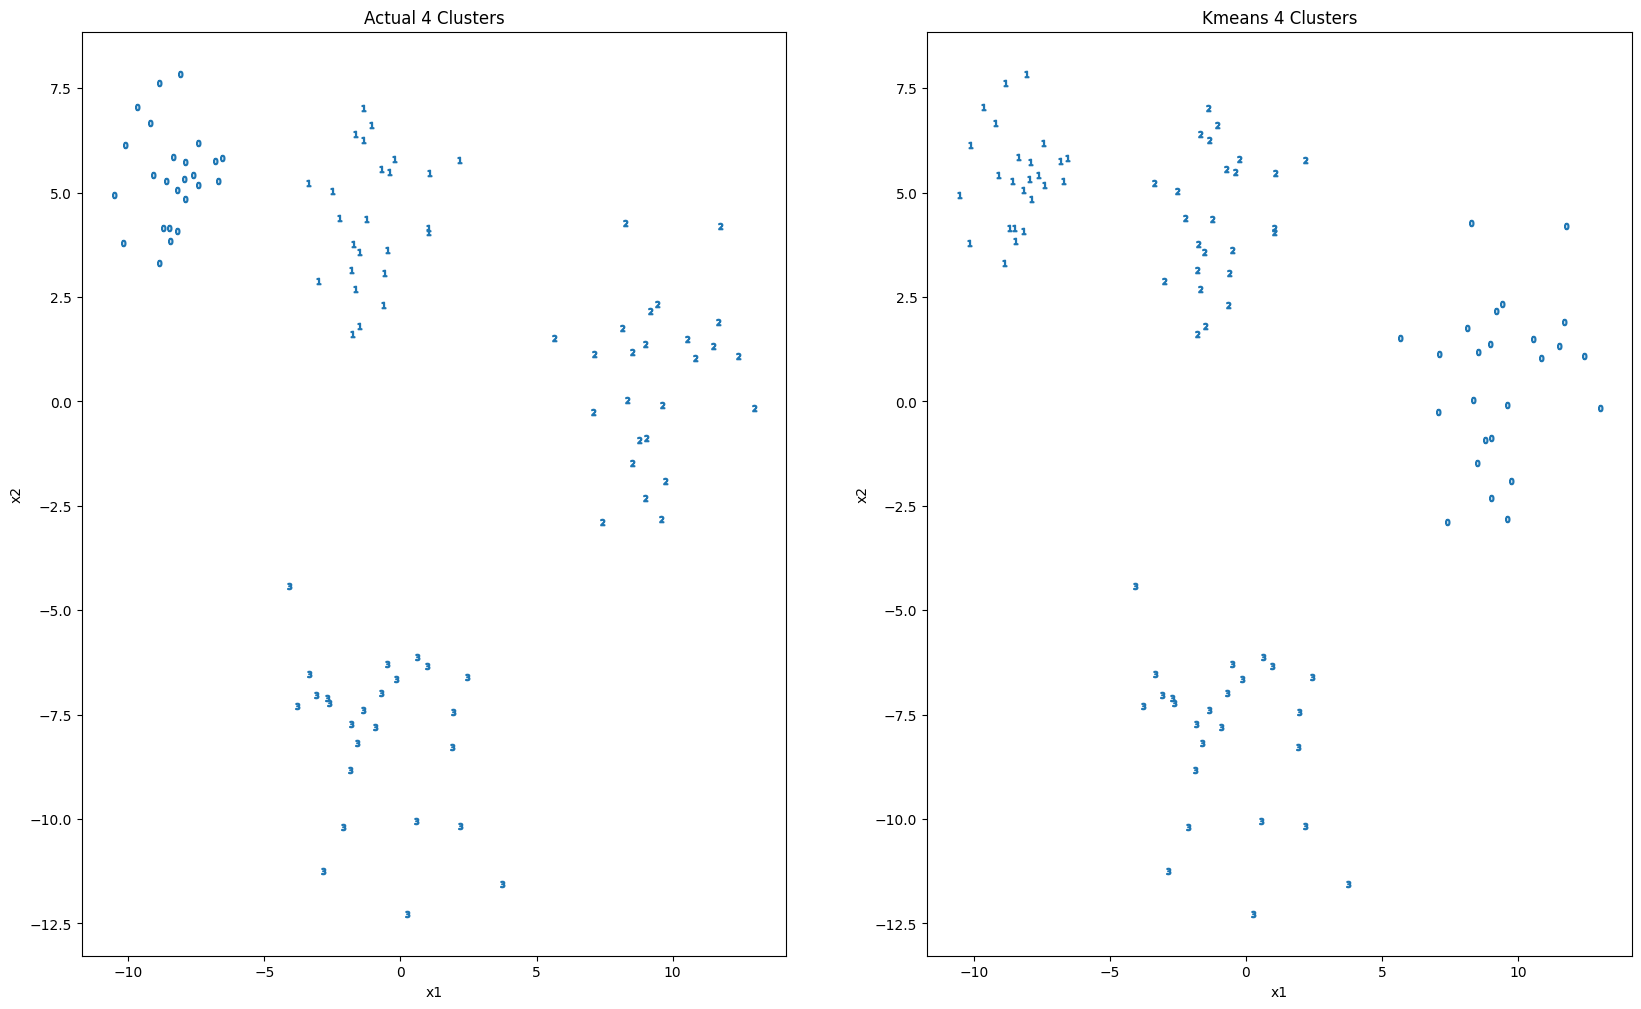

In [82]:
fig, axs = plt.subplots(1,2, figsize=(20,12)) # 1 figura, 2 ax, tamaño de la figura
plot_2d_clusters(x,y,axs[0]) # Aquí se envía la figura inicial
plot_2d_clusters(x,y_pred,axs[1]) # El objetivo de esta división es hacer la comparación

axs[0].set_title(f'Actual {axs[0].get_title()}')
axs[1].set_title(f'Kmeans {axs[1].get_title()}')